In [ ]:
#Liên kết colab với drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from numpy import save
import keras
from os import listdir
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
folder0 = '/content/drive/MyDrive/Colab Notebooks/PROJECT_AI/Gender/FEMALE/'
folder1 = '/content/drive/MyDrive/Colab Notebooks/PROJECT_AI/Gender/MALE/'
folders=[folder0,folder1]
photos, labels = list(), list()
for i in range (2):
  for file in listdir(folders[i]):
    output=i
    photo = load_img(folders[i]+'/'+file, target_size=(128,128))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/PROJECT_AI/Gender/gender_photos.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/PROJECT_AI/Gender/gender_labels.npy',labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)


(4352, 128, 128, 3) (4352,)


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu',
kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu',
kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3), activation = 'relu',
kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform')) #Dense la full connected
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
96/96 [==============================] - 17s 39ms/step - loss: 0.8164 - accuracy: 0.5640 - val_loss: 0.7025 - val_accuracy: 0.4962
Epoch 2/100
96/96 [==============================] - 3s 31ms/step - loss: 0.5934 - accuracy: 0.6953 - val_loss: 0.6231 - val_accuracy: 0.6631
Epoch 3/100
96/96 [==============================] - 3s 32ms/step - loss: 0.5293 - accuracy: 0.7446 - val_loss: 0.4700 - val_accuracy: 0.7825
Epoch 4/100
96/96 [==============================] - 3s 30ms/step - loss: 0.3823 - accuracy: 0.8437 - val_loss: 0.3992 - val_accuracy: 0.8262
Epoch 5/100
96/96 [==============================] - 3s 30ms/step - loss: 0.3341 - accuracy: 0.8529 - val_loss: 0.3867 - val_accuracy: 0.8216
Epoch 6/100
96/96 [==============================] - 3s 31ms/step - loss: 0.2532 - accuracy: 0.8926 - val_loss: 0.3434 - val_accuracy: 0.8691
Epoch 7/100
96/96 [==============================] - 3s 30ms/step - loss: 0.2119 - accuracy: 0.9100 - val_loss: 0.3412 - val_accuracy: 0.8606
Epoch

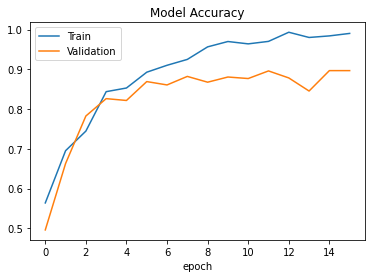

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=100,
verbose=1,validation_data=(x_test, y_test), callbacks=[callback])
model.save('gender.h5')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()
